In [5]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import spacy

In [6]:
file = pd.read_csv('winemag-data-130k-v2.csv')

In [7]:
country = Counter(file['country'])
pop_country=[]
for key,val in country.most_common(10):
    pop_country.append(key)

df = file[file['country'].isin(pop_country)]
Counter(df['country']), df['country'].size

(Counter({'Italy': 19540,
          'Portugal': 5691,
          'US': 54504,
          'Spain': 6645,
          'France': 22093,
          'Germany': 2165,
          'Argentina': 3800,
          'Chile': 4472,
          'Australia': 2329,
          'Austria': 3345}),
 124584)

In [8]:
import nltk 
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import numpy as np
import pandas as pd

des = np.load('df_desc.npy',allow_pickle=True)

des = pd.DataFrame(des)
des.columns=['desc']
des['country']= np.array(df['country'])
Counter(des['country'])


Counter({'Italy': 19540,
         'Portugal': 5691,
         'US': 54504,
         'Spain': 6645,
         'France': 22093,
         'Germany': 2165,
         'Argentina': 3800,
         'Chile': 4472,
         'Australia': 2329,
         'Austria': 3345})

## 1-gram analysis

In [9]:
### sample description
from sklearn.feature_extraction import text 

## remove stop words
stopwords = ["wine","rich","character",'pinor','noir',"flavor", "riesling","flavors","Cabernet Sauvignon","palate","aroma","hints","finish",'nose','note','ripe','Cabernet','cabernet','malbec',"Sauvignon",'mouth','year']
stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)


In [10]:
def tfidf_score(country_des):
    vectorizer = CountVectorizer(ngram_range =(1, 1),stop_words=stop_words) 
    X1 = vectorizer.fit_transform(country_des)  
    features = (vectorizer.get_feature_names()) 
    
    #vectorizer = Vectorizer(ngram_range = (1, 1),stop_words=stop_words,use_idf=True) 
    X2 = vectorizer.fit_transform(country_des) 

    # Getting top tfidf ranking
    sums = X2.sum(axis = 0) 
    df = [] 
    for col, grams in enumerate(features): 
        df.append( (grams, sums[0, col] )) 
    ranking = pd.DataFrame(df, columns = ['words', 'tf-idf']) 
    words = (ranking.sort_values('tf-idf', ascending = False)) 
    return(words)

In [2]:
def create_cloud(tfidf_score,n):
    
    words = tfidf_score

    word_dict = dict(zip(words.words, words['tf-idf']))
    
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_dict)
    plt.figure(figsize=(3.3,1.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(str(country)+ ' wine')
    plt.savefig('cloud'+str(country),bbox_inches='tight',dpi=200)
    plt.show()
    
    
    

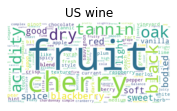

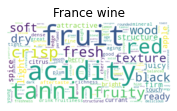

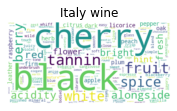

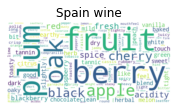

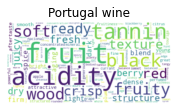

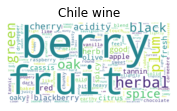

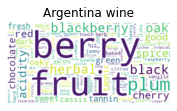

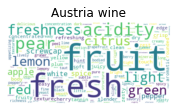

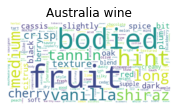

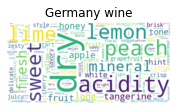

In [78]:
n=0
for country in pop_country:
 
    country_des = des[des['country']==country]['desc']
    create_cloud(tfidf_score(country_des),country)
    

/home/mecon/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sauvignon'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


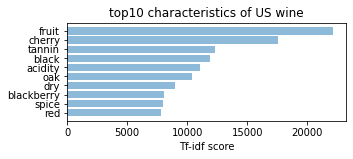

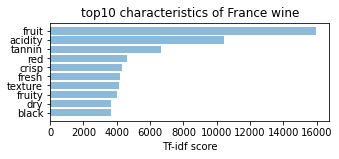

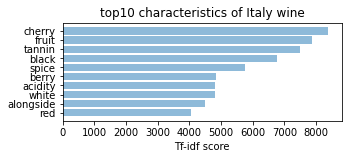

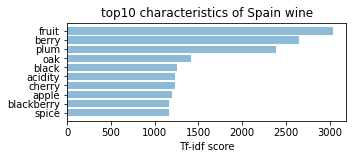

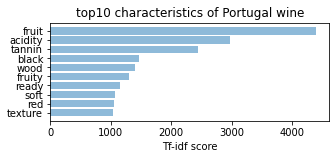

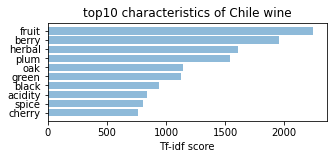

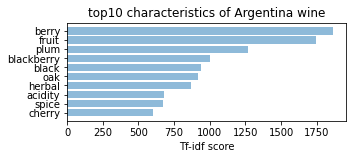

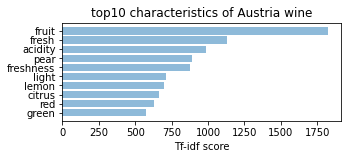

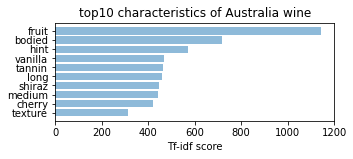

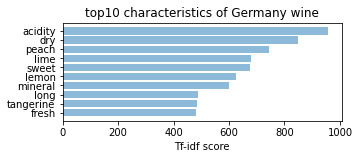

In [11]:


for country in pop_country:
    
    country_des = des[des['country']==country]['desc']
                      
    idf = tfidf_score(country_des)

    name = list(idf['words'][:10])
    score = list(idf['tf-idf'][:10])

    objects = name
    y_pos = np.arange(len(objects))[::-1]

    
    plt.figure(figsize=(5,1.8))
    plt.barh(y_pos, score, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)

    plt.xlabel('Tf-idf score')
    plt.title('top10 characteristics of '+str(country)+ ' wine')
   
    plt.savefig('unigram_'+str(country)+'.png')
    plt.show()
    